In [12]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
# Load JSON file into DataFrame
with open("out-eval.json", "r") as file:
    data = json.load(file)

# Flatten the "scoring" dictionary into separate columns
df = pd.json_normalize(data)
df

,text,annotator_topics,generated_topics,scoring.ce_scores_1to1,scoring.ce_scores
0,"<b>Italie, jmenovitě severní, má od dob Karla...","[mezistátní vztahy, malířske bratstvo]","[mezistátní vztahy, malířské bratrstvo]","[[{'from': 'mezistátní vztahy', 'to': 'mezistá...",[{'from': 'mezistátní vztahy malířské bratrstv...
1,"<b>Chce-li poznačiti nástroj, ukazuje na domn...","[nakládání s nástroji, pohyby s nástroji]","[nakládání s nástroji, pohyby s nástroji]","[[{'from': 'nakládání s nástroji', 'to': 'nakl...",[{'from': 'nakládání s nástroji pohyby s nástr...
2,<b>Při sázení některých složitějších prací je...,"[typografie, grafický design, sazba textu, pří...","[příprava tiskopisu, sazečské techniky, vizuál...","[[{'from': 'typografie', 'to': 'příprava tisko...",[{'from': 'příprava tiskopisu sazečské technik...
3,"<b>Začali večeřeti, ale nedali tomu mnoho. Mí...","[jedení, večeření]","[nechuť k jídlu, společenská večeře, paní Jadw...","[[{'from': 'jedení', 'to': 'nechuť k jídlu', '...",[{'from': 'nechuť k jídlu společenská večeře p...
4,<b>Letha od narození Syna božího tisíczeho pě...,"[uzavírání smlouv, pracovní smlouva]","[smlouva mezi řemeslníky, oděvní odměna, histo...","[[{'from': 'uzavírání smlouv', 'to': 'smlouva ...",[{'from': 'smlouva mezi řemeslníky oděvní odmě...
5,"<b>Zovou se též raci, jsou pokryty štítem na ...","[biologie, anatomie raků]","[rakovití, třídění čeledí, pohyblivé oči]","[[{'from': 'biologie', 'to': 'rakovití', 'scor...",[{'from': 'rakovití třídění čeledí pohyblivé o...
6,<b>Při vychovávání mládeže a ve školách je cv...,"[fyzické cvičení těla, cvičení duch, výchova m...","[výchova mládeže, školní vzdělávání, tělesný r...","[[{'from': 'fyzické cvičení těla', 'to': 'vých...",[{'from': 'výchova mládeže školní vzdělávání t...
7,<b>V záchvatu vděčnosti Eduard Poppe ho objal...,[homoerotické vztahy],"[vděčnost, přátelské chování, zpráva pro vrátn...","[[{'from': 'homoerotické vztahy', 'to': 'vděčn...",[{'from': 'vděčnost přátelské chování zpráva p...
8,"<b>Kdy, nelze zjistiti, snad v bouřích husits...","[historická událost, vývoj panství, šlechtické...","[husitské bouře, páni z Pernštýna, páni z Nách...","[[{'from': 'historická událost', 'to': 'husits...",[{'from': 'husitské bouře páni z Pernštýna pán...
9,"<b>Ale až poslední nádeník, kterýkoli člověk ...","[proletářska revoluce, marxizmus, komunizmus, ...","[proletářská vláda, pomoc chudině, revoluční k...","[[{'from': 'proletářska revoluce', 'to': 'prol...",[{'from': 'proletářská vláda pomoc chudině rev...


In [22]:
def get_fce_score(scoring, fce):
    score_values = pd.Series(scoring).apply(lambda x: x["score"])
    return fce(score_values)

df["ce_scoring_min"] = df["scoring.ce_scores"].apply(lambda x: get_fce_score(x, np.min))
df["ce_scoring_max"] = df["scoring.ce_scores"].apply(lambda x: get_fce_score(x, np.max))

def get_fce_score_1to1(scoring, fce):
    score_values = pd.Series(scoring).apply(lambda x: get_fce_score(x, np.max))
    return fce(score_values)

df["ce_scoring_max_1to1"] = df["scoring.ce_scores_1to1"].apply(lambda x: get_fce_score_1to1(x, np.max))
df["ce_scoring_min_1to1"] = df["scoring.ce_scores_1to1"].apply(lambda x: get_fce_score_1to1(x, np.min))
df

,text,annotator_topics,generated_topics,scoring.ce_scores_1to1,scoring.ce_scores,ce_scoring_min,ce_scoring_max,ce_scoring_max_1to1,ce_scoring_min_1to1
0,"<b>Italie, jmenovitě severní, má od dob Karla...","[mezistátní vztahy, malířske bratstvo]","[mezistátní vztahy, malířské bratrstvo]","[[{'from': 'mezistátní vztahy', 'to': 'mezistá...",[{'from': 'mezistátní vztahy malířské bratrstv...,0.719414,0.925492,0.972149,0.971311
1,"<b>Chce-li poznačiti nástroj, ukazuje na domn...","[nakládání s nástroji, pohyby s nástroji]","[nakládání s nástroji, pohyby s nástroji]","[[{'from': 'nakládání s nástroji', 'to': 'nakl...",[{'from': 'nakládání s nástroji pohyby s nástr...,0.833386,0.899797,0.971900,0.971664
2,<b>Při sázení některých složitějších prací je...,"[typografie, grafický design, sazba textu, pří...","[příprava tiskopisu, sazečské techniky, vizuál...","[[{'from': 'typografie', 'to': 'příprava tisko...",[{'from': 'příprava tiskopisu sazečské technik...,0.028801,0.620971,0.626348,0.028633
3,"<b>Začali večeřeti, ale nedali tomu mnoho. Mí...","[jedení, večeření]","[nechuť k jídlu, společenská večeře, paní Jadw...","[[{'from': 'jedení', 'to': 'nechuť k jídlu', '...",[{'from': 'nechuť k jídlu společenská večeře p...,0.032658,0.187865,0.700236,0.034106
4,<b>Letha od narození Syna božího tisíczeho pě...,"[uzavírání smlouv, pracovní smlouva]","[smlouva mezi řemeslníky, oděvní odměna, histo...","[[{'from': 'uzavírání smlouv', 'to': 'smlouva ...",[{'from': 'smlouva mezi řemeslníky oděvní odmě...,0.412914,0.581126,0.588314,0.544257
5,"<b>Zovou se též raci, jsou pokryty štítem na ...","[biologie, anatomie raků]","[rakovití, třídění čeledí, pohyblivé oči]","[[{'from': 'biologie', 'to': 'rakovití', 'scor...",[{'from': 'rakovití třídění čeledí pohyblivé o...,0.097088,0.118915,0.075188,0.042477
6,<b>Při vychovávání mládeže a ve školách je cv...,"[fyzické cvičení těla, cvičení duch, výchova m...","[výchova mládeže, školní vzdělávání, tělesný r...","[[{'from': 'fyzické cvičení těla', 'to': 'vých...",[{'from': 'výchova mládeže školní vzdělávání t...,0.531448,0.791764,0.970993,0.503164
7,<b>V záchvatu vděčnosti Eduard Poppe ho objal...,[homoerotické vztahy],"[vděčnost, přátelské chování, zpráva pro vrátn...","[[{'from': 'homoerotické vztahy', 'to': 'vděčn...",[{'from': 'vděčnost přátelské chování zpráva p...,0.043665,0.043665,0.186541,0.186541
8,"<b>Kdy, nelze zjistiti, snad v bouřích husits...","[historická událost, vývoj panství, šlechtické...","[husitské bouře, páni z Pernštýna, páni z Nách...","[[{'from': 'historická událost', 'to': 'husits...",[{'from': 'husitské bouře páni z Pernštýna pán...,0.035859,0.296525,0.402233,0.028577
9,"<b>Ale až poslední nádeník, kterýkoli člověk ...","[proletářska revoluce, marxizmus, komunizmus, ...","[proletářská vláda, pomoc chudině, revoluční k...","[[{'from': 'proletářska revoluce', 'to': 'prol...",[{'from': 'proletářská vláda pomoc chudině rev...,0.080527,0.615864,0.727174,0.059892


<Axes: xlabel='ce_scoring_max', ylabel='Count'>

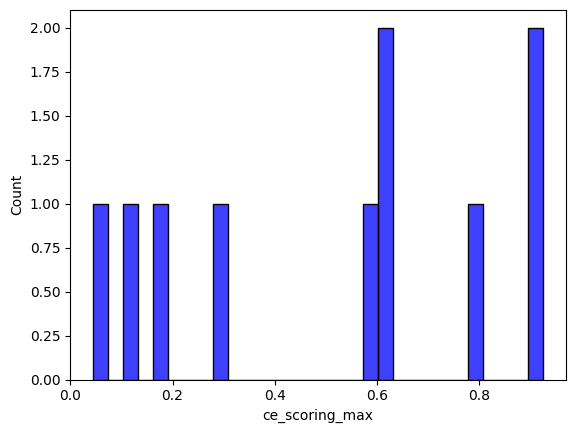

In [17]:

sns.histplot(df["ce_scoring_max"], bins=30, color="b")